In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train=pd.read_csv("Data_Train.csv")

In [6]:
test=pd.read_csv("Data_Test.csv")

In [78]:
train.shape

(78458, 11)

In [254]:
test.shape

(19615, 10)

In [7]:
data=pd.concat([train,test])

In [8]:
data.shape

(98073, 11)

In [161]:
data.head()

,Comments,Followers,Genre,Likes,Name,Popularity,Song_Name,Unique_ID,Views,Year,Month
0,4,119563,danceedm,499.0,Hardstyle,97.0,N-Vitral presents BOMBSQUAD - Poison Spitter (...,413890,14017.0,2018,3
1,17,2141,danceedm,49.0,Dj Aladdin,17.0,Dj Aladdin - Old School Hip Hop Quick Mix,249453,1918.0,2016,6
2,11,22248,danceedm,312.0,Maxximize On Air,91.0,Maxximize On Air - Mixed by Blasterjaxx - Epis...,681116,9668.0,2015,5
3,2,393655,rbsoul,2400.0,GR6 EXPLODE,76.0,MC Yago - Tenho Compromisso (DJ R7),387253,113036.0,2017,6
4,81,201030,danceedm,3031.0,Tritonal,699.0,Escape (feat. Steph Jones),1428029,110024.0,2016,9


## Preprocessing

In [9]:
data.duplicated().sum()

0

In [10]:
data.isna().sum()

Comments          0
Country           0
Followers         0
Genre             0
Likes             0
Name              0
Popularity        0
Song_Name         1
Timestamp         0
Unique_ID         0
Views         19615
dtype: int64

In [8]:
data["Song_Name"]=data["Song_Name"].transform(lambda x:x.fillna(x.mode()[0]))

In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98073 entries, 0 to 19614
Data columns (total 11 columns):
Comments      98073 non-null int64
Country       98073 non-null object
Followers     98073 non-null int64
Genre         98073 non-null object
Likes         98073 non-null object
Name          98073 non-null object
Popularity    98073 non-null object
Song_Name     98073 non-null object
Timestamp     98073 non-null object
Unique_ID     98073 non-null int64
Views         78458 non-null float64
dtypes: float64(1), int64(3), object(7)
memory usage: 9.0+ MB


In [9]:
data.head()

,Comments,Country,Followers,Genre,Likes,Name,Popularity,Song_Name,Timestamp,Unique_ID,Views
0,4,AU,119563,danceedm,499,Hardstyle,97,N-Vitral presents BOMBSQUAD - Poison Spitter (...,2018-03-30 15:24:45.000000,413890,14017.0
1,17,AU,2141,danceedm,49,Dj Aladdin,17,Dj Aladdin - Old School Hip Hop Quick Mix,2016-06-20 05:58:52.000000,249453,1918.0
2,11,AU,22248,danceedm,312,Maxximize On Air,91,Maxximize On Air - Mixed by Blasterjaxx - Epis...,2015-05-08 17:45:59.000000,681116,9668.0
3,2,AU,393655,rbsoul,"2,400",GR6 EXPLODE,76,MC Yago - Tenho Compromisso (DJ R7),2017-06-08 23:50:03.000000,387253,113036.0
4,81,AU,201030,danceedm,"3,031",Tritonal,699,Escape (feat. Steph Jones),2016-09-17 20:50:19.000000,1428029,110024.0


In [326]:
# data["Views"]=data["Views"].astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

## Comments

In [14]:
data['Comments'].nunique()

2379

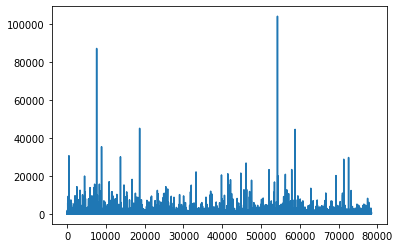

In [15]:
plt.plot(data["Comments"])

## Country

In [16]:
data["Country"].value_counts()

AU    98073
Name: Country, dtype: int64

In [10]:
del(data["Country"])

In [260]:
data.columns

Index(['Comments', 'Followers', 'Genre', 'Likes', 'Name', 'Popularity',
       'Song_Name', 'Timestamp', 'Unique_ID', 'Views'],
      dtype='object')

## Followers

In [19]:
data["Followers"].nunique()

1161

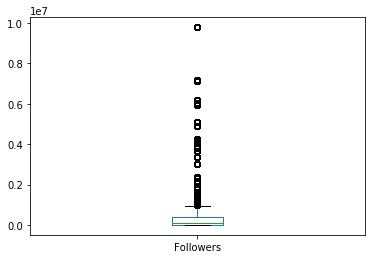

In [20]:
data["Followers"].plot(kind="box")

In [21]:
data.columns

Index(['Comments', 'Followers', 'Genre', 'Likes', 'Name', 'Popularity',
       'Song_Name', 'Timestamp', 'Unique_ID', 'Views'],
      dtype='object')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98073 entries, 0 to 19614
Data columns (total 10 columns):
Comments      98073 non-null int64
Followers     98073 non-null int64
Genre         98073 non-null object
Likes         98073 non-null object
Name          98073 non-null object
Popularity    98073 non-null object
Song_Name     98073 non-null object
Timestamp     98073 non-null object
Unique_ID     98073 non-null int64
Views         78458 non-null float64
dtypes: float64(1), int64(3), object(6)
memory usage: 8.2+ MB


## Genre

In [23]:
data["Genre"].nunique()

21

In [24]:
data["Genre"].value_counts()

danceedm                28319
electronic              22981
all-music               12839
rbsoul                   6802
latin                    5683
trap                     5018
rock                     4978
deephouse                3017
pop                      2254
dubstep                  1355
ambient                  1077
classical                 958
drumbass                  812
metal                     651
disco                     471
country                   414
alternativerock           186
hiphoprap                 129
reggaeton                  66
folksingersongwriter       51
indie                      12
Name: Genre, dtype: int64

In [25]:
genre_t10=data["Genre"].value_counts().sort_values(ascending=False).head(10).index

In [26]:
genre_t10

Index(['danceedm', 'electronic', 'all-music', 'rbsoul', 'latin', 'trap',
       'rock', 'deephouse', 'pop', 'dubstep'],
      dtype='object')

In [27]:
# for values,t in zip(data["Genre"],genre_t10):
#     print(values,t)
#     if t in values:
#         print(t)
#     else:
#         print("other")

In [28]:
# def Gen(datas):
#     for values in datas:
#         if values in genre_t10:
#             print(values)
#         else:
#             print("other")

In [29]:
# data["Genre"].apply(lambda x:Gen(data["Genre"]))

In [30]:
data["Genre"].value_counts()

danceedm                28319
electronic              22981
all-music               12839
rbsoul                   6802
latin                    5683
trap                     5018
rock                     4978
deephouse                3017
pop                      2254
dubstep                  1355
ambient                  1077
classical                 958
drumbass                  812
metal                     651
disco                     471
country                   414
alternativerock           186
hiphoprap                 129
reggaeton                  66
folksingersongwriter       51
indie                      12
Name: Genre, dtype: int64

In [82]:
data.columns

Index(['Comments', 'Country', 'Followers', 'Genre', 'Likes', 'Name',
       'Popularity', 'Song_Name', 'Timestamp', 'Unique_ID', 'Views'],
      dtype='object')

## Likes

In [261]:
data.Likes.value_counts()

0        2355
1         801
2         791
3         731
4         635
5         552
6         514
8         476
7         473
9         404
11        402
10        399
12        350
16        332
14        329
13        320
15        287
20        275
21        274
17        271
19        271
18        264
22        259
23        238
27        238
26        221
25        217
24        213
30        201
29        196
         ... 
8,747       1
4,494       1
9,108       1
250K        1
8,961       1
7,871       1
8,922       1
5,962       1
5,265       1
7,863       1
8,568       1
7,166       1
7,190       1
5,487       1
7,521       1
8,160       1
4,328       1
7,287       1
7,378       1
7,360       1
568K        1
4,678       1
6,919       1
7,013       1
5,262       1
6,946       1
1.74M       1
8,565       1
9,610       1
5,432       1
Name: Likes, Length: 9758, dtype: int64

In [262]:
import re

In [11]:
data["Likes"]=data.Likes.transform(lambda x:x.replace(",",""))

In [12]:
data["Likes"]=(data.Likes.replace(r'[KM]+$', '', regex=True).astype(float) * \
              data.Likes.str.extract(r'[\d\.]+([KM]+)', expand=False)
                .fillna(1)
                .replace(['K','M'], [10**3, 10**6]).astype(int))

In [265]:
data.columns

Index(['Comments', 'Followers', 'Genre', 'Likes', 'Name', 'Popularity',
       'Song_Name', 'Timestamp', 'Unique_ID', 'Views'],
      dtype='object')

## Names

In [34]:
data['Name'].value_counts()

Mixmag                        2598
Monstercat                    1773
GR6 EXPLODE                   1747
Hardstyle                     1422
Sweet Musique                 1229
officialb2s                   1090
trndmsk                       1040
Uptempo HC Channel            1003
Resident Advisor               997
LEGENDA FUNK                   914
Steve Aoki                     900
MrSuicideSheep                 866
Dirty Workz                    852
DHA AM (Deep House London)     808
Kompakt                        804
Dim Mak Records                782
DJ R7                          772
Beats In Space                 711
Mad Decent                     698
Queen                          689
FACT                           683
moogmusicinc                   660
Roadrunner USA                 651
Big Beat Records               642
Scantraxx                      626
Ensis Records                  611
Morgan Page                    602
Armin van Buuren               590
W. A. Production®   

In [266]:
# del(data["Name"])

In [112]:
data.columns

Index(['Comments', 'Country', 'Followers', 'Genre', 'Likes', 'Popularity',
       'Song_Name', 'Timestamp', 'Unique_ID', 'Views'],
      dtype='object')

## Popularity

In [37]:
data["Popularity"].nunique()

6259

In [13]:
data['Popularity']=data["Popularity"].transform(lambda x:x.replace(",",""))

In [14]:
data["Popularity"]=(data.Popularity.replace(r'[KM]+$', '', regex=True).astype(float) * \
              data.Popularity.str.extract(r'[\d\.]+([KM]+)', expand=False)
                .fillna(1)
                .replace(['K','M'], [10**3, 10**6]).astype(int))

## Song Name

In [269]:
data["Song_Name"].nunique()

98072

In [275]:
del(data["Song_Name"])

## Timestamp

In [121]:
data["Timestamp"].nunique()

84593

In [122]:
data["Timestamp"]

0        2018-03-30 15:24:45.000000
1        2016-06-20 05:58:52.000000
2        2015-05-08 17:45:59.000000
3        2017-06-08 23:50:03.000000
4        2016-09-17 20:50:19.000000
5        2017-11-27 14:55:11.000000
6        2016-01-22 17:23:26.000000
7        2012-01-17 00:00:00.000000
8        2018-11-29 22:37:07.000000
9        2017-09-28 04:07:47.000000
10       2014-09-29 10:29:11.000000
11       2016-03-04 22:42:57.000000
12       2011-07-12 21:55:03.000000
13       2018-06-15 20:23:04.000000
14       2016-01-03 17:02:42.000000
15       2018-01-06 19:54:59.000000
16       2018-04-17 17:35:41.000000
17       2013-10-14 20:44:39.000000
18       2011-10-27 23:28:43.000000
19       2018-02-10 02:14:25.000000
20       2018-10-12 09:20:09.000000
21       2015-08-31 13:29:36.000000
22       2016-10-10 18:54:21.000000
23       2018-12-06 13:25:18.000000
24       2016-10-17 23:04:49.000000
25       2015-06-08 17:02:49.000000
26       2018-09-25 21:46:56.000000
27       2015-08-14 00:00:00

In [123]:
for i in data.Timestamp:
    ans=i.split("-")[0]
print(ans)

2015


In [15]:
data["Year"]=data["Timestamp"].transform(lambda x:x.split("-")[0]).astype(int)

In [271]:
data["Year"].nunique()

32

In [16]:
data["Month"]=data.Timestamp.transform(lambda x:x.split("-")[1]).astype(int)

In [273]:
data.Month.nunique()

12

In [116]:
data.head()

,Comments,Followers,Genre,Likes,Name,Popularity,Song_Name,Unique_ID,Views,Year,Month
0,4,119563,danceedm,499.0,Hardstyle,97.0,N-Vitral presents BOMBSQUAD - Poison Spitter (...,413890,14017.0,2018,3
1,17,2141,danceedm,49.0,Dj Aladdin,17.0,Dj Aladdin - Old School Hip Hop Quick Mix,249453,1918.0,2016,6
2,11,22248,danceedm,312.0,Maxximize On Air,91.0,Maxximize On Air - Mixed by Blasterjaxx - Epis...,681116,9668.0,2015,5
3,2,393655,rbsoul,2400.0,GR6 EXPLODE,76.0,MC Yago - Tenho Compromisso (DJ R7),387253,113036.0,2017,6
4,81,201030,danceedm,3031.0,Tritonal,699.0,Escape (feat. Steph Jones),1428029,110024.0,2016,9


In [18]:
data.drop(columns={"Timestamp"},inplace=True)

In [278]:
data.Unique_ID.nunique()

98073

In [131]:
# del(data["Unique_ID"])

In [279]:
data.shape

(98073, 9)

In [292]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98073 entries, 0 to 19614
Data columns (total 9 columns):
Comments      98073 non-null int64
Followers     98073 non-null int64
Genre         98073 non-null object
Likes         98073 non-null float64
Popularity    98073 non-null float64
Unique_ID     98073 non-null int64
Views         78458 non-null float64
Year          98073 non-null int32
Month         98073 non-null int32
dtypes: float64(3), int32(2), int64(3), object(1)
memory usage: 6.7+ MB


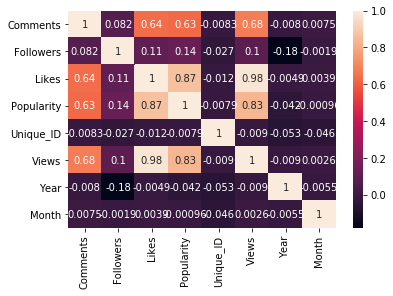

In [19]:
sns.heatmap(data.corr(),annot=True)

In [20]:
from sklearn.decomposition import PCA

In [146]:
cat_col=data.select_dtypes(exclude=np.number).drop(columns={"Name","Song_Name","Genre"})

In [147]:
num_col=data.select_dtypes(include=np.number).drop(columns={"Year","Month"})

In [63]:
num_col

,Comments,Followers,Likes,Popularity,Unique_ID,Views
0,4,119563,499.0,97.0,413890,14017.0
1,17,2141,49.0,17.0,249453,1918.0
2,11,22248,312.0,91.0,681116,9668.0
3,2,393655,2400.0,76.0,387253,113036.0
4,81,201030,3031.0,699.0,1428029,110024.0
5,6,71038,4500.0,325.0,2839,223716.0
6,15,119563,1017.0,226.0,414871,37480.0
7,5,7120051,88.0,12.0,209496,4022.0
8,0,1892,28.0,7.0,967409,1263.0
9,0,2835,622.0,47.0,171948,27874.0


In [148]:
cat_col_pr=pd.get_dummies(cat_col)

ValueError: No objects to concatenate

In [149]:
data_new=pd.concat([num_col,cat_col],axis=1)

In [150]:
data_new.shape

(98073, 6)

In [151]:
data_new.head()

,Comments,Followers,Likes,Popularity,Unique_ID,Views
0,4,119563,499.0,97.0,413890,14017.0
1,17,2141,49.0,17.0,249453,1918.0
2,11,22248,312.0,91.0,681116,9668.0
3,2,393655,2400.0,76.0,387253,113036.0
4,81,201030,3031.0,699.0,1428029,110024.0


## Train and Test

In [152]:
train_new=data_new[data_new["Views"].notna()]

In [153]:
test_new=data_new[data_new["Views"].isna()]

In [154]:
train_new["Views"]=train_new["Views"].astype(int)

In [71]:
test_new.shape


(19615, 27)

## X and Y split

In [155]:
X=train_new.drop(columns={"Views","Unique_ID"})

In [156]:
y=train_new["Views"]

In [157]:
X.head()

,Comments,Followers,Likes,Popularity
0,4,119563,499.0,97.0
1,17,2141,49.0,17.0
2,11,22248,312.0,91.0
3,2,393655,2400.0,76.0
4,81,201030,3031.0,699.0


In [158]:
y.shape

(78458,)

In [77]:
y.head()

0     14017
1      1918
2      9668
3    113036
4    110024
Name: Views, dtype: int32

## Scaled X 

In [34]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [78]:
std=StandardScaler()

In [79]:
mima=MinMaxScaler()

In [80]:
scaled_X=std.fit_transform(X)

In [81]:
scaled_X

array([[-0.15355976, -0.30750745, -0.15769982, ..., -0.02648592,
        -0.23177912, -0.2334534 ],
       [-0.13561908, -0.40803029, -0.16622674, ..., -0.02648592,
        -0.23177912, -0.2334534 ],
       [-0.14389939, -0.39081705, -0.16124323, ..., -0.02648592,
        -0.23177912, -0.2334534 ],
       ...,
       [-0.15769991,  0.79126846, -0.16418028, ..., -0.02648592,
        -0.23177912, -0.2334534 ],
       [-0.12595871, -0.28680739, -0.16012526, ..., -0.02648592,
        -0.23177912, -0.2334534 ],
       [-0.15355976, -0.33359997, -0.13249804, ..., -0.02648592,
        -0.23177912, -0.2334534 ]])

In [82]:
minmax_X=mima.fit_transform(X)

In [311]:
minmax_X

array([[3.84312369e-05, 1.22137614e-02, 1.80144404e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.63332757e-04, 2.18610004e-04, 1.76895307e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.05685902e-04, 2.27262465e-03, 1.12635379e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.60780923e-06, 1.43328074e-01, 5.66787004e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.30587421e-04, 1.46838501e-02, 1.33935018e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.84312369e-05, 9.10020327e-03, 6.60288809e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

## Train and Test

In [159]:
test_x=test_new.drop(columns={"Views","Unique_ID"})

## PCA

In [40]:
from sklearn.decomposition import PCA

In [84]:
pca=PCA()

In [85]:
pca.fit(scaled_X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [86]:
x_pca=pca.transform(scaled_X)

In [87]:
x_pca.shape

(78458, 25)

In [88]:
X.shape

(78458, 25)

## LinearRegression

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lin=LinearRegression()

In [89]:
lin.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
test_pred=lin.predict(test_x)

In [91]:
test_pred

array([220781.02053398, -33373.51567226, -52344.3327485 , ...,
       -86221.26260053, 184882.56990038, -40816.29195765])

In [92]:
test_pred=pd.DataFrame(test_pred,columns=["Views"],dtype=int)

In [93]:
lin_result=pd.concat([test_new["Unique_ID"],test_pred],axis=1)

In [94]:
lin_result.head()

,Unique_ID,Views
0,562546,220781
1,907584,-33373
2,213013,-52344
3,340312,-157333
4,41854,3874


In [327]:
lin_result.to_excel("Linear.xlsx",index=False)

## Function

In [59]:
from sklearn.metrics import mean_squared_error

In [143]:
def model_fit(model,X,y,test,file_name):
    model.fit(X,y)
    test_pred=model.predict(test_x)
    test_pred_df=pd.DataFrame(test_pred,columns=["Views"])
    train_pred=model.predict(X)
    print("Train RMSE:",np.sqrt(mean_squared_error(y,train_pred)))
    result=pd.concat([test_new["Unique_ID"],test_pred_df],axis=1)
    result.to_excel(file_name,index=False)

In [96]:
model_fit(lin,X,y,test_x,"Linear1.xlsx")

Train RMSE: 725916.787880679


## Polynomial

In [351]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
test_x_poly = poly_reg.fit_transform(test_x)

In [ ]:
## Lasso

In [97]:
from sklearn.linear_model import Lasso

In [100]:
las=Lasso(alpha=0.010,normalize=True)

In [101]:
model_fit(las,X,y,test_x,"Lasso.xlsx")

Train RMSE: 725916.7880816554


In [102]:
from sklearn.ensemble import AdaBoostRegressor

In [103]:
ada=AdaBoostRegressor()

In [105]:
model_fit(ada,X,y,test_x,"AdaBoost")

Train RMSE: 1123082.132332543


In [106]:
from sklearn.ensemble import RandomForestRegressor

In [141]:
rfc=RandomForestRegressor(max_depth=13)

In [160]:
model_fit(rfc,X,y,test_x,"RFC2_MD_15.xlsx")

Train RMSE: 326502.20807988447


# Model

In [174]:
from sklearn.metrics import mean_squared_error

In [241]:
def model_sel(model,X,y):
    train_x,test_x,train_y,test_y=train_test_split(X, y, test_size=0.3,random_state=99)
    model.fit(train_x,train_y)
    train_pred=model.predict(train_x)
    test_pred=model.predict(test_x)
    print("Train_RMSE: ",np.sqrt(mean_squared_error(train_y,train_pred)))
    print("Test_RMSE: ",np.sqrt(mean_squared_error(test_y,test_pred)))

## Linear Regression

In [176]:
from sklearn.linear_model import LinearRegression

In [177]:
lin=LinearRegression()

In [249]:
model_sel(lin,X,y)

Train_RMSE:  2.7755876442846303e-09
Test_RMSE:  2.444688640215741e-09


In [244]:
model_sel(lin,minmax_X,y)

Train_RMSE:  736077.1278383918
Test_RMSE:  707942.9748532185


In [181]:
model_sel(lin,scaled_X,y)

Train_RMSE:  736025.7960104799
Test_RMSE:  707888.706447875


## Polynomial

In [229]:
from sklearn.preprocessing import PolynomialFeatures

In [233]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
test_X_poly = poly_reg.fit_transform(test_x)

In [236]:
print("Train RMSE:",np.sqrt(mean_squared_error(test_x,test_X_poly)))

ValueError: y_true and y_pred have different number of output (27!=406)

## Lasso

In [222]:
from sklearn.linear_model import Lasso

In [225]:
las=Lasso(alpha=10)

In [245]:
model_sel(las,X,y)

Train_RMSE:  0.33885196627794406
Test_RMSE:  0.3352183055809474


In [227]:
result=pd.read_excel("Sample_Submission.xlsx")

In [228]:
result

,Unique_ID,Views
0,562546,7
1,907584,98
2,213013,31
3,340312,51
4,41854,85
5,1031846,66
6,627446,53
7,1509777,37
8,1270147,53
9,1486926,45


## Decision Tree

In [205]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [183]:
dt=DecisionTreeRegressor()

In [115]:
model_sel(dt,X,y)

NameError: name 'model_sel' is not defined

In [185]:
model_sel(dt,scaled_X,y)

Train_RMSE:  492.5584231176323
Test_RMSE:  778031.016316195


In [203]:
dt=DecisionTreeRegressor(min_samples_split=25)

In [204]:
model_sel(dt,X,y)

Train_RMSE:  840093.3379845384
Test_RMSE:  867835.6740598293


In [215]:
param_grid=[{ 'min_samples_split': [30,35,40,45],
   'max_depth' : [5,6,7,8,9,10]
}]

In [216]:
grid=GridSearchCV(dt,param_grid)

In [217]:
model_sel(grid,X,y)

Train_RMSE:  907170.374639512
Test_RMSE:  889794.4899103477


In [218]:
grid.fit(train_x,train_y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=25,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [5, 6, 7, 8, 9, 10],
                          'min_samples_split': [30, 35, 40, 45]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

In [219]:
grid.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=30, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [220]:
grid.best_params_

{'max_depth': 5, 'min_samples_split': 30}

In [221]:
grid.best_score_

0.9025021331552966